In [1]:
%matplotlib notebook

from ipywidgets import *
import os, sys, glob
import imageio
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import signal
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#from modules.fileHandling import *
from modules.parameters import parameters as params
sys.path.append("/reg/neh/home5/khegazy/baseTools/UEDanalysis/modules")
sys.path.append("/reg/neh/home5/khegazy/baseTools/modules")
sys.path.append("../../")
from data_handling import *
from fitting import *
from data_retrieval import *
from parameters import get_parameters

In [2]:
date = "20150904"
run = "N2O"
rType = "fullRevival"
run = "fullRevival"
params = get_parameters(run)

q = np.arange(params.NradAzmBins)*params.QperPix
print(np.sum(q<2), np.sum(q<4))

#params["xray_cut_high"] = 20000
#params["xray_cut_low"] = 10000
data_path = os.path.join("/reg/ued/ana/scratch/N2O/data/converted", date, params.molName, params.run)

fig_prefix = "./plots/{}_{}_".format(date, run)

59 117


In [3]:
images = []
print(os.path.join(data_path, "scan*"))
for fld in glob.glob(os.path.join(data_path, "scan*")):
    print(fld)
    for fl in glob.glob(os.path.join(fld, "image*")):
        images.append(np.expand_dims(imageio.imread(fl), 0))
images = np.concatenate(images, 0)

/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan*
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan23_L3
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan23_L4
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan33_L3
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan31_L4
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan31_L3
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan17_L1
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan33_L4
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan31_L1
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan23_L2
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan33_L1
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan31_L2
/reg/ued/ana/scratch/N2O/data/converted/20150904/N2O/fullRevival/scan21_L1
/reg/ued/ana/scratch/N2O/data

<IPython.core.display.Javascript object>


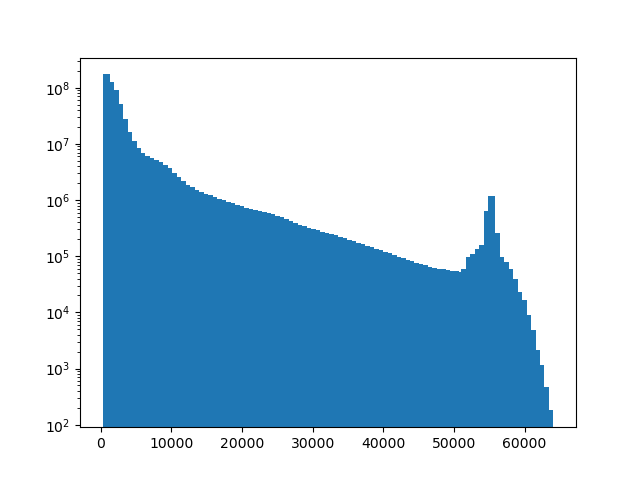

In [4]:
xInds = np.arange(images.shape[0])
bin_hist, bins = np.histogram(images[xInds,:,:], bins=100)
bins_ = (bins + 0.5*(bins[1] - bins[0]))[:-1]
fig, ax = plt.subplots()
ax.bar(bins_, bin_hist, width=1000, align='center')
ax.set_yscale('log')



SHAPE (553, 1024, 1024)


<IPython.core.display.Javascript object>


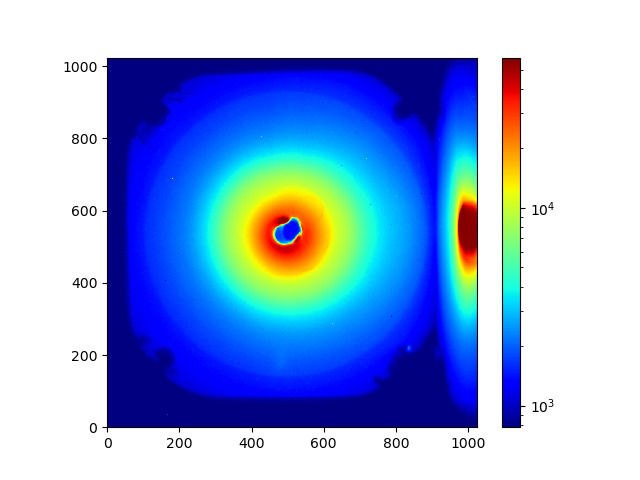

'\nfor i in range(11):\n    fig, ax = plt.subplots()\n    ax.set_title("Images {} - {}".format(i*50, (i+1)*50))\n    pcm = ax.pcolormesh(X_plt, Y_plt, np.mean(images[i*50:(i+1)*50], axis=0), cmap=\'jet\',\n        norm=colors.LogNorm(vmin=1.5*np.amin(mean_image), vmax=np.amax(mean_image)))\n    ax.set_aspect(1)\n    ax.set_xlim([0,mean_image.shape[-1]])\n    ax.set_ylim([0,mean_image.shape[-1]])\n    fig.colorbar(pcm, ax=ax)\n'

In [4]:
mean_image = np.mean(images, axis=0)
print("SHAPE", images.shape)

X_plt,Y_plt = np.meshgrid(np.arange(mean_image.shape[1]+1), np.arange(mean_image.shape[0]+1))
#plt.ion()

fig, ax = plt.subplots()
pcm = ax.pcolormesh(X_plt, Y_plt, mean_image, cmap='jet',
    norm=colors.LogNorm(vmin=1.5*np.amin(mean_image), vmax=np.amax(mean_image)))
ax.set_aspect(1)
ax.set_xlim([0,mean_image.shape[-1]])
ax.set_ylim([0,mean_image.shape[-1]])
fig.colorbar(pcm, ax=ax)

"""
for i in range(11):
    fig, ax = plt.subplots()
    ax.set_title("Images {} - {}".format(i*50, (i+1)*50))
    pcm = ax.pcolormesh(X_plt, Y_plt, np.mean(images[i*50:(i+1)*50], axis=0), cmap='jet',
        norm=colors.LogNorm(vmin=1.5*np.amin(mean_image), vmax=np.amax(mean_image)))
    ax.set_aspect(1)
    ax.set_xlim([0,mean_image.shape[-1]])
    ax.set_ylim([0,mean_image.shape[-1]])
    fig.colorbar(pcm, ax=ax)
"""

In [11]:
with open("mean_image.npy", "wb") as file:
    np.save(file, mean_image)

<IPython.core.display.Javascript object>


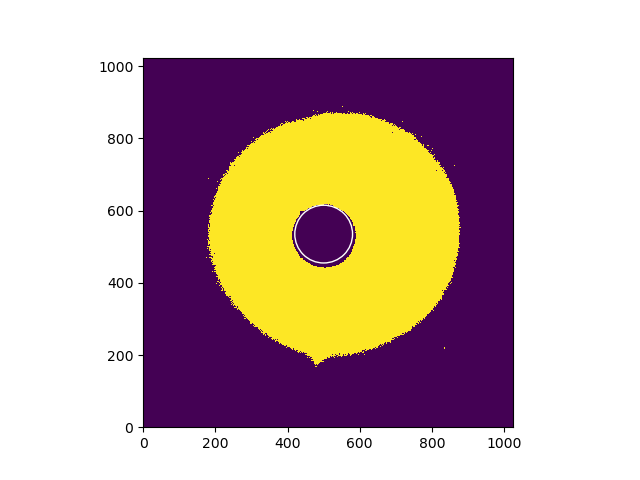

In [32]:
a = mean_image > 2e3
b = mean_image < 20e3
c = mean_image < 900
f = a*b
f[:,900:] = 0
f[470:600,436:550] = 0
fig,ax = plt.subplots()
ax.set_aspect(1)
ax.pcolormesh(f)
hole_centR = 535
hole_centC = 500
hole_width = 53
circle1 = plt.Circle((hole_centC, hole_centR), 80, fill=False, color='w')
circle2 = plt.Circle((hole_centC, hole_centR), 128, fill=False, color='w')
ax.add_artist(circle1)
#ax.add_artist(circle2)

<IPython.core.display.Javascript object>


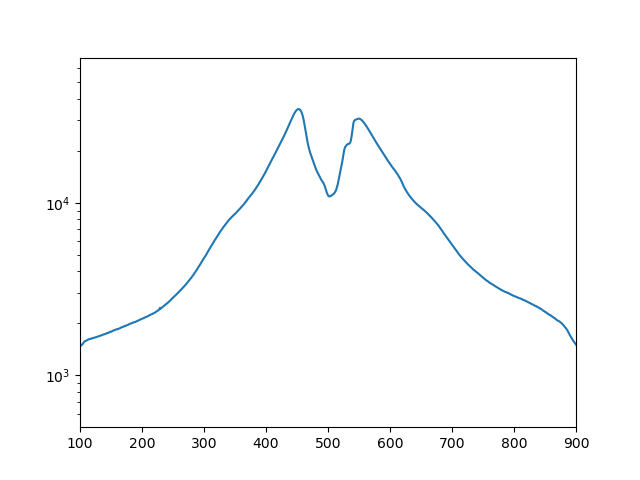

(100.0, 900.0)

In [32]:
fig, ax = plt.subplots()
ax.plot(np.mean(mean_image[490:570,:], axis=0))
ax.set_yscale('log')
ax.set_xlim([100,900])

<IPython.core.display.Javascript object>


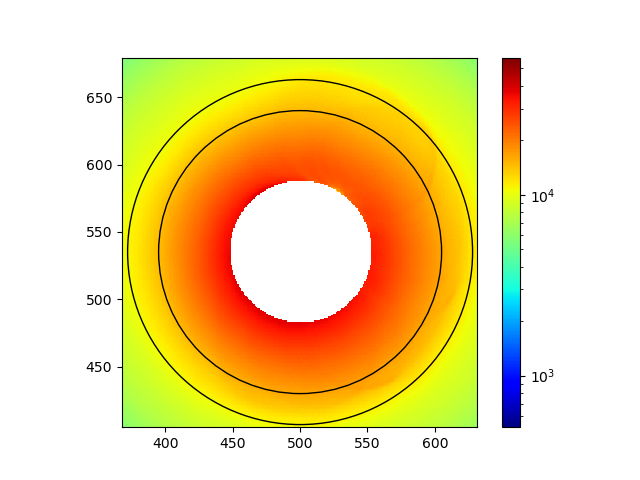

In [13]:
hole_centR = 535
hole_centC = 500
hole_width = 53

X,Y = np.meshgrid(np.arange(mean_image.shape[1]) - hole_centC, np.arange(mean_image.shape[0]) - hole_centR)
R = np.sqrt(X**2 + Y**2)
hole_cover = copy(mean_image)
hole_cover[R<hole_width] = np.nan
fig, ax = plt.subplots()
pcm = ax.pcolormesh(X_plt, Y_plt, hole_cover, cmap='jet',
    norm=colors.LogNorm(vmin=np.amin(mean_image), vmax=np.amax(mean_image)))
ax.set_aspect(1)
ax.set_xlim([0,mean_image.shape[-1]])
ax.set_ylim([0,mean_image.shape[-1]])

circle1 = plt.Circle((hole_centC, hole_centR), 105, fill=False, color='k')
circle2 = plt.Circle((hole_centC, hole_centR), 128, fill=False, color='k')
ax.add_artist(circle1)
ax.add_artist(circle2)
fig.colorbar(pcm, ax=ax)


<IPython.core.display.Javascript object>


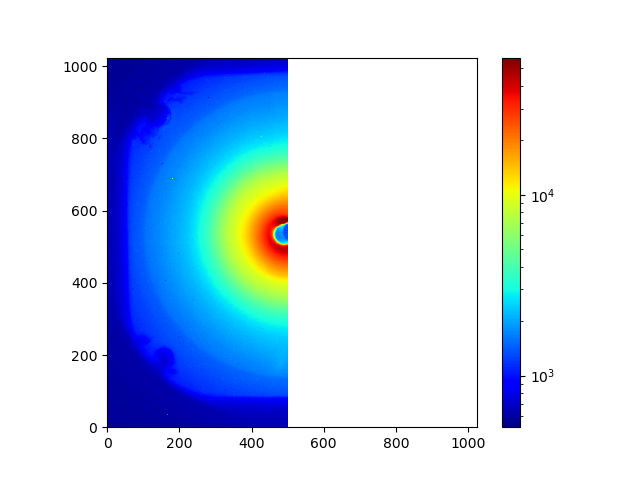

In [29]:
# NAN MAP
nan_colCut = 500

nan_cover = copy(mean_image)
nan_cover[:,nan_colCut:] = np.nan
fig, ax = plt.subplots()
pcm = ax.pcolormesh(X_plt, Y_plt, nan_cover, cmap='jet',
    norm=colors.LogNorm(vmin=np.amin(mean_image), vmax=np.amax(mean_image)))
ax.set_aspect(1)
ax.set_xlim([0,mean_image.shape[-1]])
ax.set_ylim([0,mean_image.shape[-1]])
fig.colorbar(pcm, ax=ax)

<IPython.core.display.Javascript object>


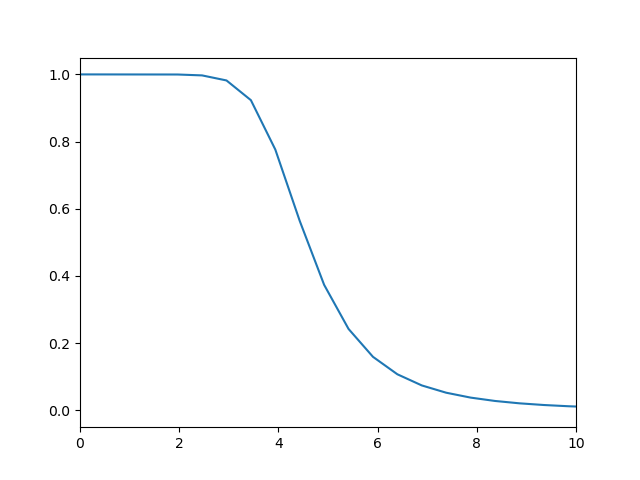

(0.0, 10.0)

In [24]:
order = 5
cutOff = 0.03
Ftype = "lowpass"
Nbins = 278

b, a = signal.butter(
    order,
    cutOff,
    Ftype,
    analog=False)

w, h = signal.freqz(b, a, worN=Nbins)
output = abs(h)
output.astype(np.double)

fig, ax = plt.subplots()
ax.plot(np.arange(Nbins)*2*np.pi/(0.023*555), output)
ax.set_xlim(0,10)

In [5]:
im = images[0].astype(float)

high_inds = np.where(im > params["xray_cut_high"])
print("max", np.amax(im))
loop = np.arange(len(high_inds[0]))
cinds = np.concatenate([np.arange(x, 1024) for x in high_inds[0]]).astype(int)
rinds = np.concatenate([np.ones(1024-high_inds[0][i])*high_inds[1][i]
    for i in range(len(high_inds[0]))]).astype(int)
im[rinds[:],cinds[:]] = np.nan

low_inds = np.where(im > params["xray_cut_low"])

max 31296.0


In [6]:
#img_proc.remove_xrays(im, 20000, 15000, 3, 20)

ArgumentError: argument 1: <class 'TypeError'>: Don't know how to convert parameter 1

In [9]:
print(im.shape)
print(np.asanyarray(im, dtype=float))

(1024, 1024)
[[463. 431. 467. ... 541. 544. 486.]
 [488. 459. 494. ... 547. 520. 511.]
 [503. 489. 500. ... 532. 498. 471.]
 ...
 [495. 513. 590. ... 553. 532. 508.]
 [526. 508. 489. ... 522. 570. 597.]
 [519. 511. 490. ... 490. 559. 581.]]
